<a href="https://colab.research.google.com/github/udaykbce/Netflix_Movies_and_TV_shows2/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING_2_(data_minds).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

**CONTENT**

* Introduction
* Importing libraries
* Data Wrangling
* Exploratory Data Analysis
* Data preprocessing
    * Wordcloud
    * Removing Stopwords
    * Removing Punctuation
    * Stemming
* Clustring
    * PCA
    * Elbow and Silhouette Method
    * K-Means Clustring
* Inference



**Introduction**



Netflix employs data science to always provide us with the appropriate content. They categorise all of the information that people in specific area are now seeing using a clustering and classification algorithm. Also, they employ a recommender system to predicts a person's preferences in the future given a specific quantity of sparse data.


#Importing Libraries

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.cm as cm

# library used for textual data prerocessing
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# library used for building recommandation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Warnings library. Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading our dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone4/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
df.shape

(7787, 12)

In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

There are 12 columns in the given dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [9]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


Here no duplicate value present in the given dataset.

In [10]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
# Total count of null value
df.isnull().sum().sum()

3631

Here in given dataset a total of 3631 null value present in which director has the most number of null values then cast has 718 null values then country has 507 null values then date_added has 10 and rating has 7 null values.

**Managing Null Values**

In [12]:
df['country'].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [13]:
# Handling Missing Values & Missing Value Imputation
df[['director','cast','country']] = df[['director','cast','country']].fillna(' ')
df.dropna(axis=0, inplace=True)

In [14]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,,Nasty C,,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


Rows of column 'date_added' and 'rating' having null values which can not be filled by mean value or frequent value.

In [15]:
df.dropna(subset=['date_added','rating'],inplace=True)

In [16]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

**EDA Part**

In [17]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [18]:
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

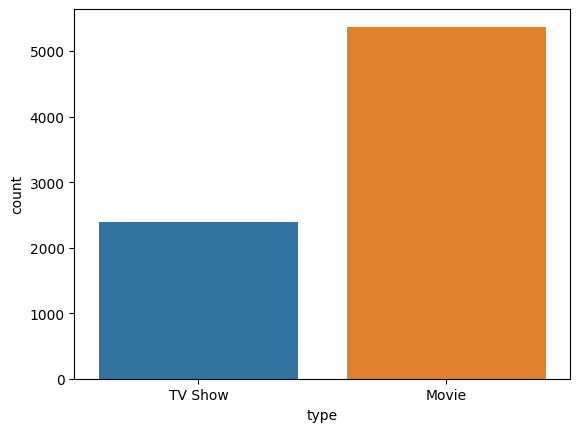

In [19]:
sns.countplot(x = df['type'])

Netflix has 5372 movies and 2398 TV shows, there are more number movies on Netflix than TV shows.




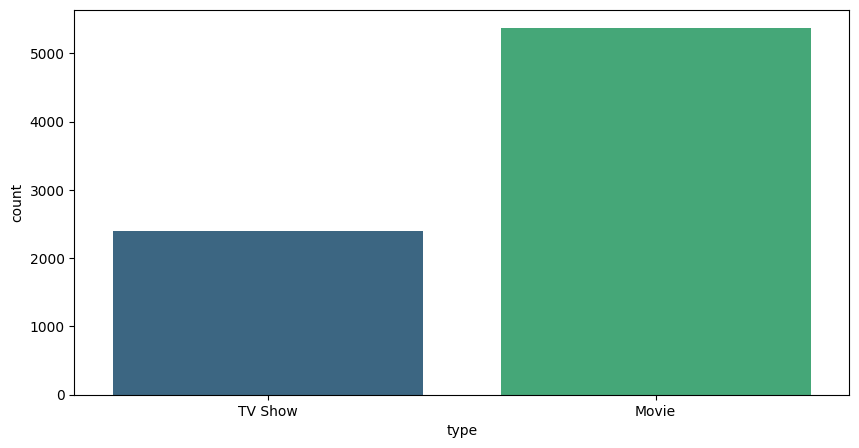

In [20]:
a,ax=plt.subplots(figsize=(10,5))
sns.countplot(data=df, x="type",palette="viridis",ax=ax)
plt.show()

In [21]:
df['country'].value_counts().reset_index(name='counts').T

,0,1,2,3,4,5,6,7,8,9,...,672,673,674,675,676,677,678,679,680,681
index,United States,India,,United Kingdom,Japan,South Korea,Canada,Spain,France,Egypt,...,"United States, South Korea, Japan","Lebanon, United Arab Emirates, France, Switzer...","France, Australia, Germany","Ireland, United States","United States, Canada, Germany","Russia, United States, China","Italy, Switzerland, France, Germany","United States, United Kingdom, Canada","United States, United Kingdom, Japan","Sweden, Czech Republic, United Kingdom, Denmar..."
counts,2546,923,505,396,224,183,177,134,115,101,...,1,1,1,1,1,1,1,1,1,1


<Axes: title={'center': 'Top 15 Countries(content_maker)'}, xlabel='country', ylabel='count'>

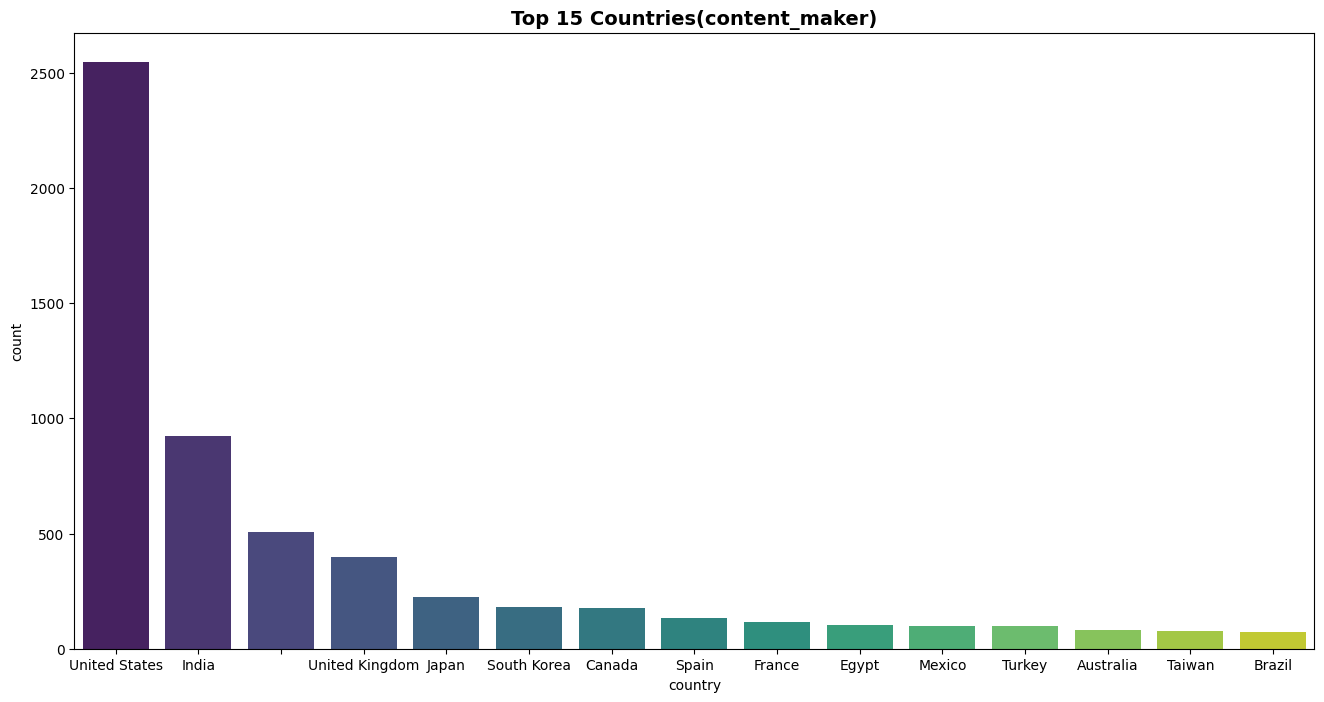

In [22]:
plt.figure(figsize=(16,8))
plt.title('Top 15 Countries(content_maker)',size='14', fontweight='bold')
sns.countplot(x='country', data=df, palette='viridis', order=df['country'].value_counts().index[0:15])

United states has the highest number of content on the netflix ,followed by India, United Kingdom and so on.

In [23]:
df['date_added'].head()

0      August 14, 2020
1    December 23, 2016
2    December 20, 2018
3    November 16, 2017
4      January 1, 2020
Name: date_added, dtype: object

In [24]:
df["date_added"] = pd.to_datetime(df['date_added'])  # First convert date_added to date time format.
df['day_added'] = df['date_added'].dt.day            # add day. Here we use dt as accessor object for date time.
df['year_added'] = df['date_added'].dt.year          # add year.
df['month_added'] = df['date_added'].dt.month        # add date.

In [25]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,day_added,year_added,month_added
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,2020,1


**Director**

In [26]:
directors= df.director.value_counts().reset_index().head(25)[1:]             # not taking 'not_available' rows
directors.rename(columns={'index':'directors_name', 'director':'Count'}, inplace=True)
fig = px.bar(directors, x='directors_name', y='Count', text_auto=True,
             color='Count')
fig.update_layout(
    title={
        'text': 'Top 25 directors making highest number of Movies and Tv Shows.',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1200,
        height=500)
fig.show()

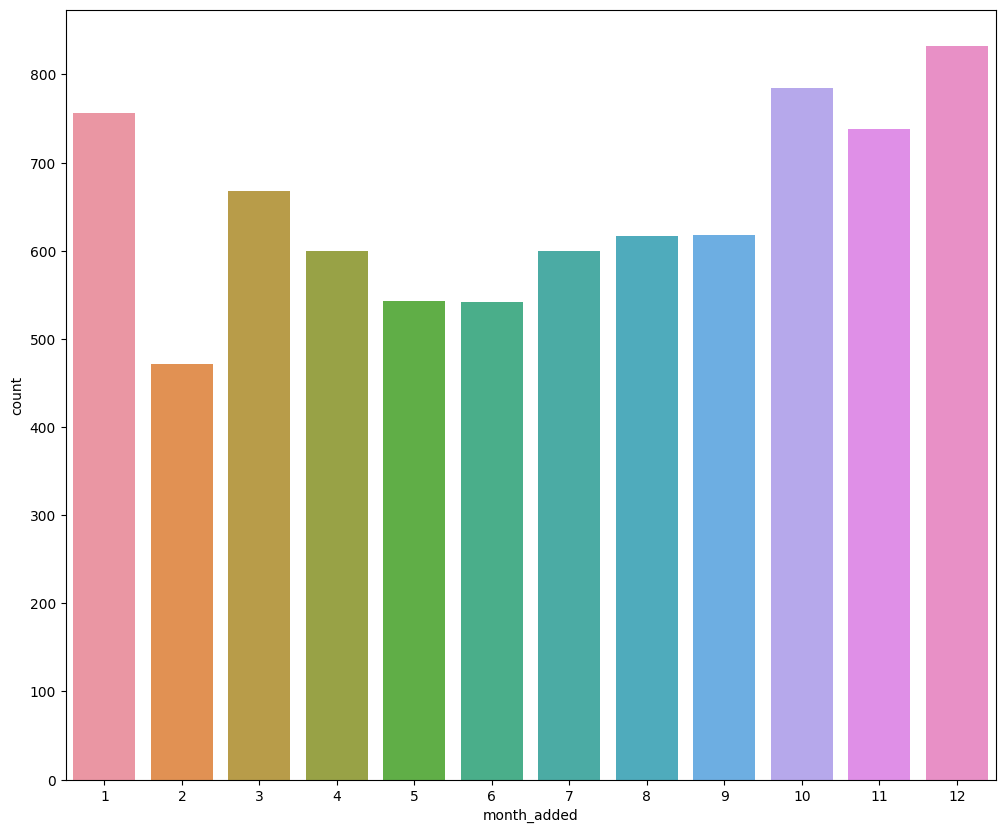

In [27]:
plt.figure(figsize=(12,10))
ax=sns.countplot(data=df, x='month_added')
plt.show()

*Most of the content is uploaded either by year ending or beginning.*
*October, November, December, and January are months in which many shows and movies get uploaded to the platform.*
*It might be due to the winter, as in these months people may stay at home and watch shows and movies in their free time.*

<Axes: xlabel='month_added', ylabel='count'>

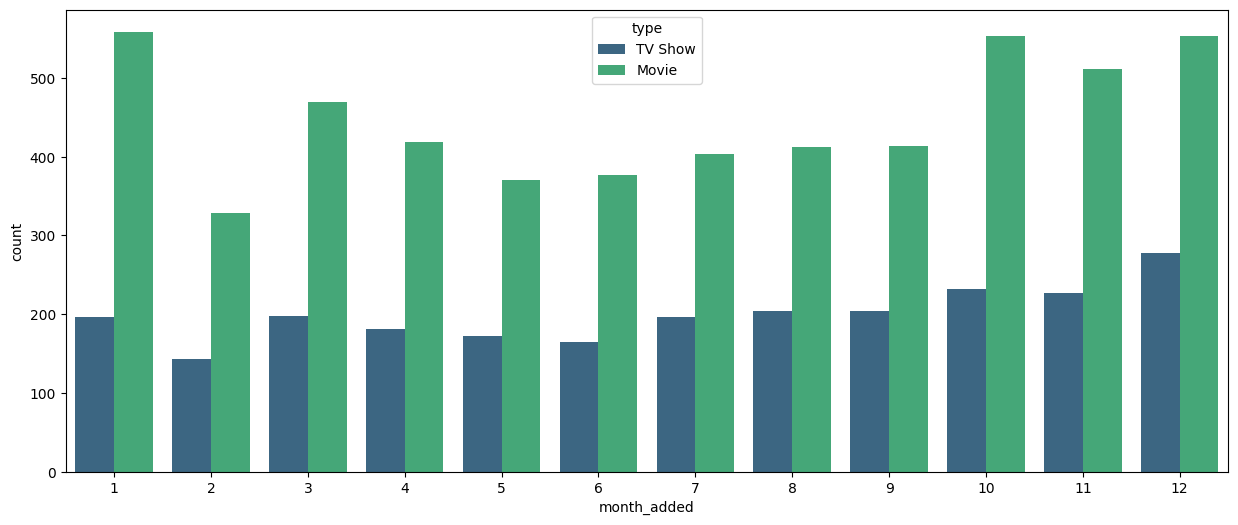

In [28]:
fig, ax = plt.subplots(figsize=(15,6))

sns.countplot(x='month_added', hue='type',palette='viridis', data=df, ax=ax)

From the above graph, we can observe that highest movie added in month January, October, and December. And Highest TV show added in the month of December.

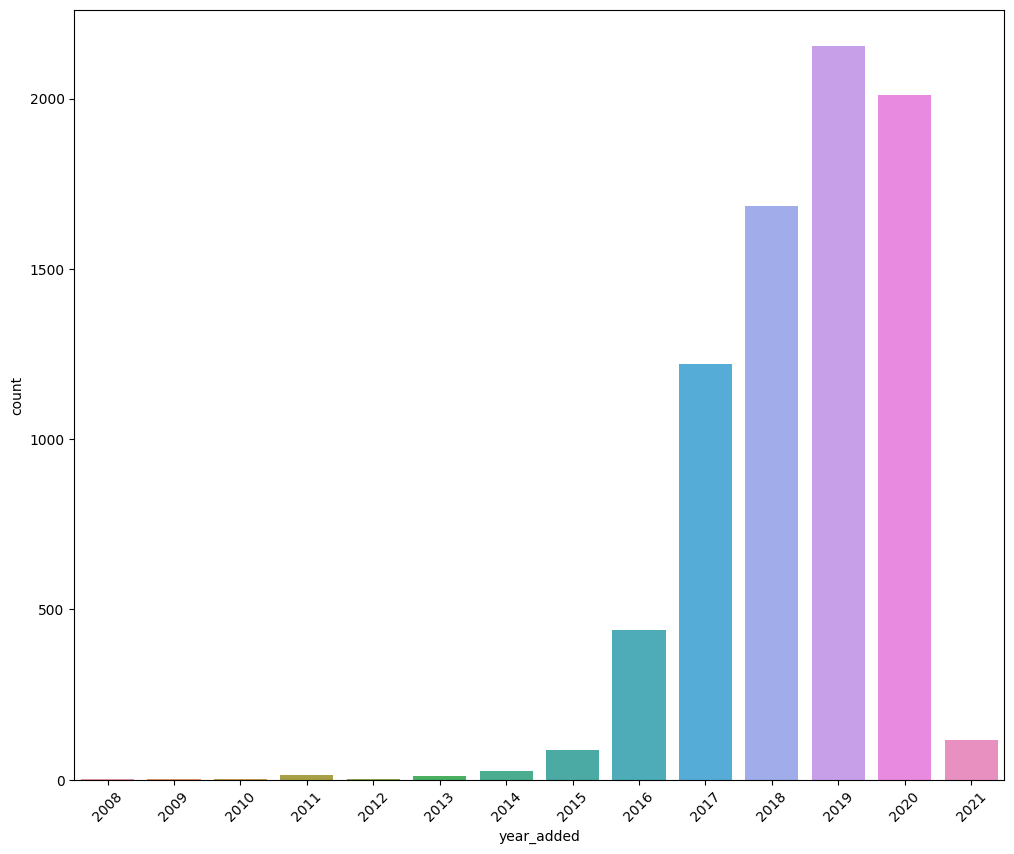

In [29]:
plt.figure(figsize=(12,10))
ax=sns.countplot(data=df, x='year_added')
plt.xticks(rotation=45)
plt.show()

* 2019 is the year when most of the contents are added in netflix.

<Axes: xlabel='year_added', ylabel='count'>

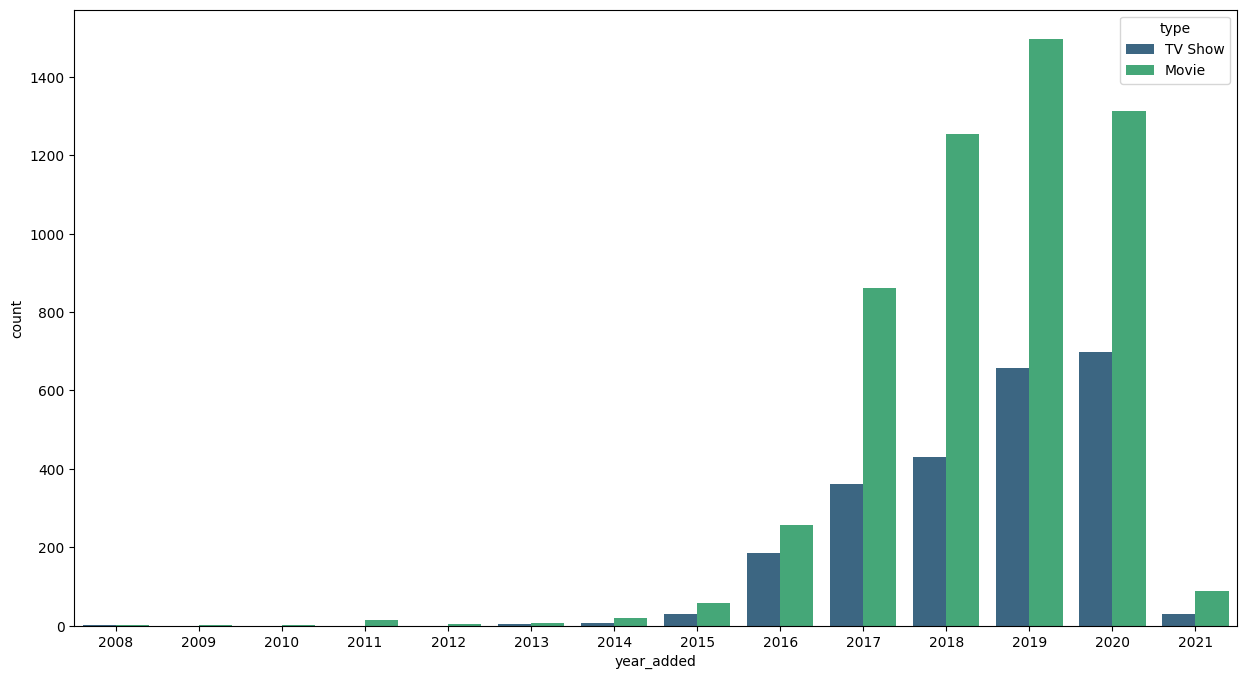

In [30]:
fig, ax = plt.subplots(figsize=(15,8))

sns.countplot(x='year_added', hue='type', palette='viridis', data=df, ax=ax)

From this graph, we can observe the trend that there are increament in movie as well as TV shows from year 2017 to 2019. But after 2019, there is decreament in Movie but increament in TV shows.

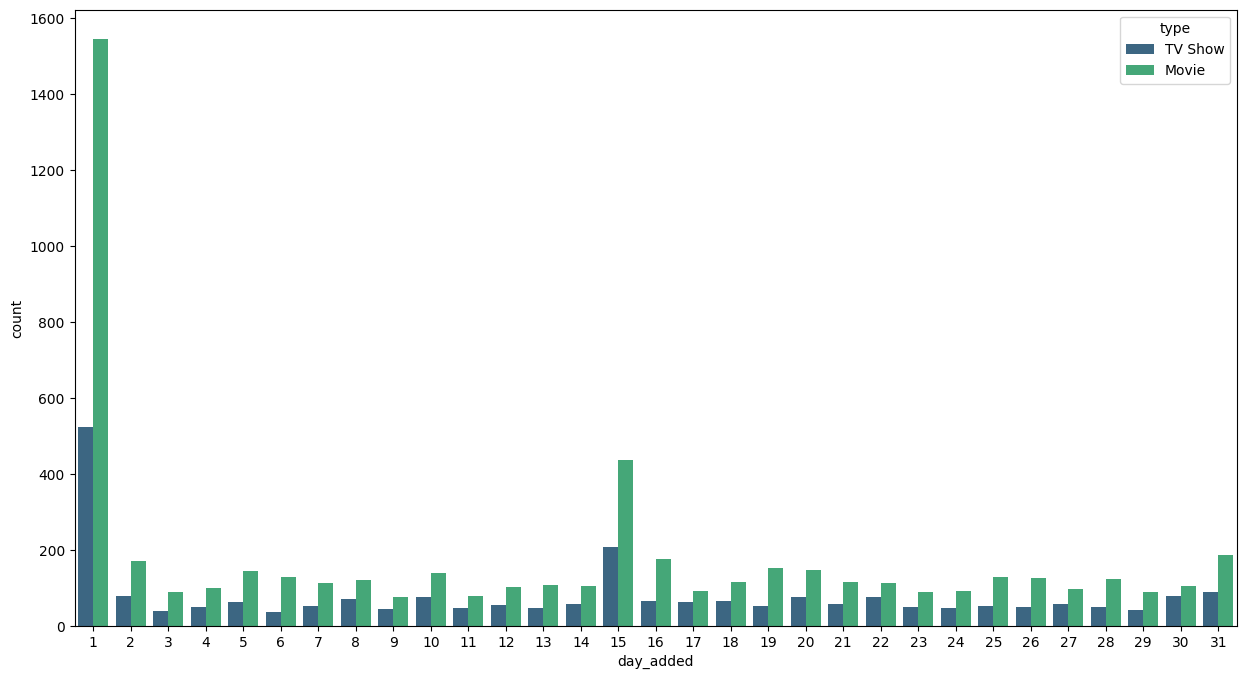

In [31]:
fig, ax = plt.subplots(figsize=(15,8))

sns.countplot(x='day_added', hue='type', palette='viridis', data=df, ax=ax)
plt.show()

* From the above graph we can asuume that most of the contents added on the first of the month followed by 15th and 31st.

**Release Year**

Release year is the year in which contents are releases on the netflix.

In [32]:
df_year = df['release_year'].value_counts().sort_index(ascending=False)

In [33]:
df_year

2021      31
2020     868
2019     996
2018    1120
2017    1010
        ... 
1945       3
1944       3
1943       3
1942       2
1925       1
Name: release_year, Length: 73, dtype: int64

<Axes: title={'center': 'Highest number of content release in 20 years'}, xlabel='release_year', ylabel='count'>

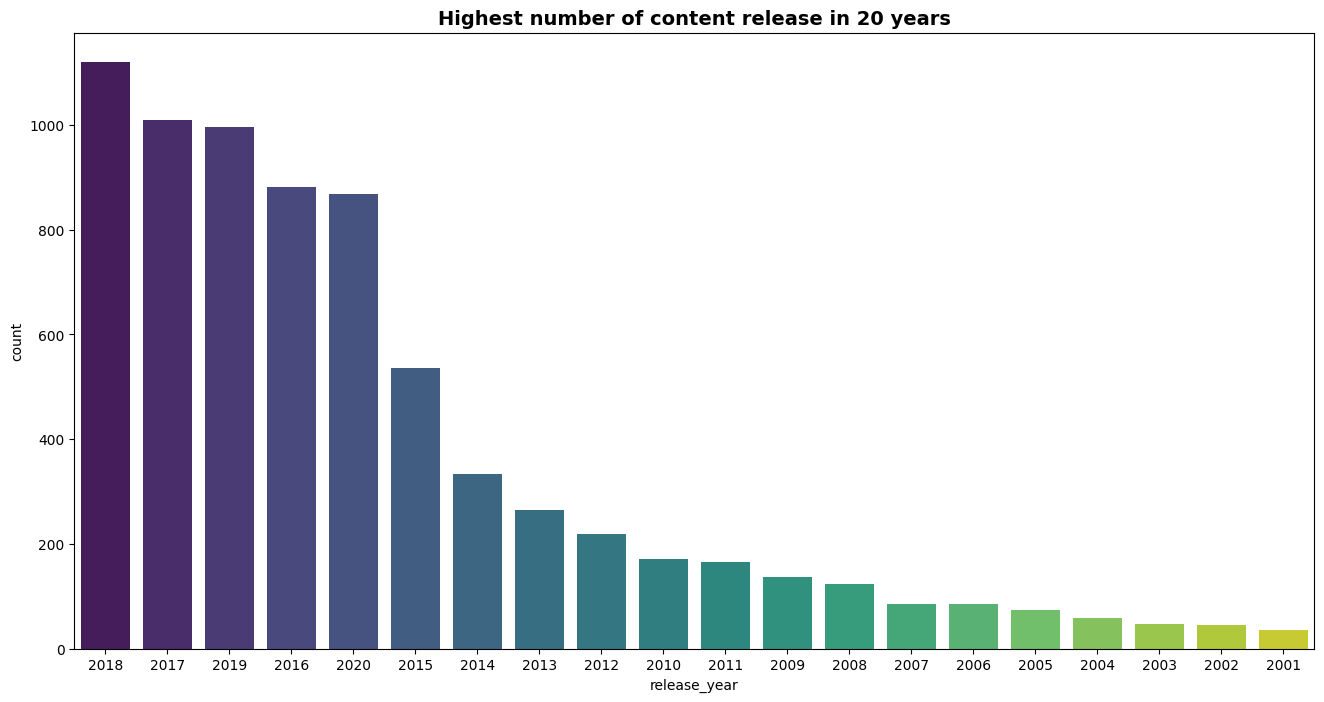

In [34]:
plt.figure(figsize=(16,8))
plt.title('Highest number of content release in 20 years',size='14', fontweight='bold')
sns.countplot(x='release_year', data=df, palette='viridis', order=df['release_year'].value_counts().index[0:20])

From the above graph, we can observe that in year 2018, most numbers of the content was released and least number of content in the year 2021.

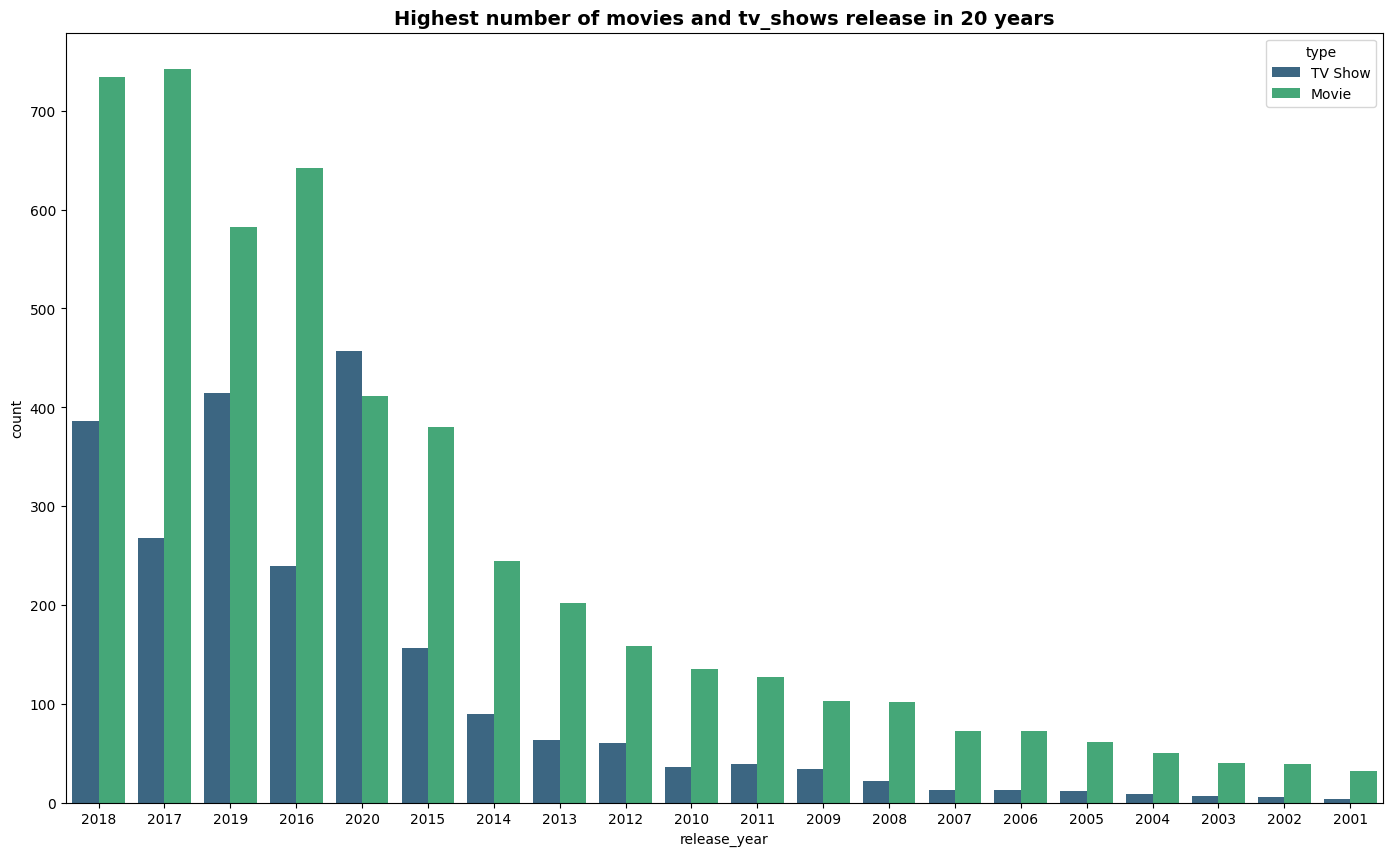

In [35]:
fig, ax = plt.subplots(figsize=(17,10))
plt.title('Highest number of movies and tv_shows release in 20 years',size='14', fontweight='bold')
sns.countplot(x='release_year', hue='type', palette='viridis', data=df,order=df['release_year'].value_counts().index[0:20])
plt.show()

* From the above graph we can see 2018 is the year in which most no. of the movies are rleased and in 2020 most of the tv_shows are released.

In [36]:
df1=df.groupby(['release_year','type']).size().reset_index(name='Count_movies/tv_shows')
df1=df1[df1['release_year']>=2005]
graph= px.line(df1, x="release_year", y="Count_movies/tv_shows", color='type')
graph.update_layout( title={'text': "Production of movies and tv_shows over the years",'y':0.95,'x':0.5})
graph.show()


* Compared to TV series, the quantity of Netflix movies is increasing noticeably more quickly.
* After 2015, we noticed a significant rise in the quantity of films and television programmes.
* After 2020, there is a sharp decline in the volume of films and television programmes made.

* It looks that Netflix has prioritised adding more movie material over TV shows. The growth of movies has been far more pronounced than that of TV shows.

**Ratings**

In [37]:
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

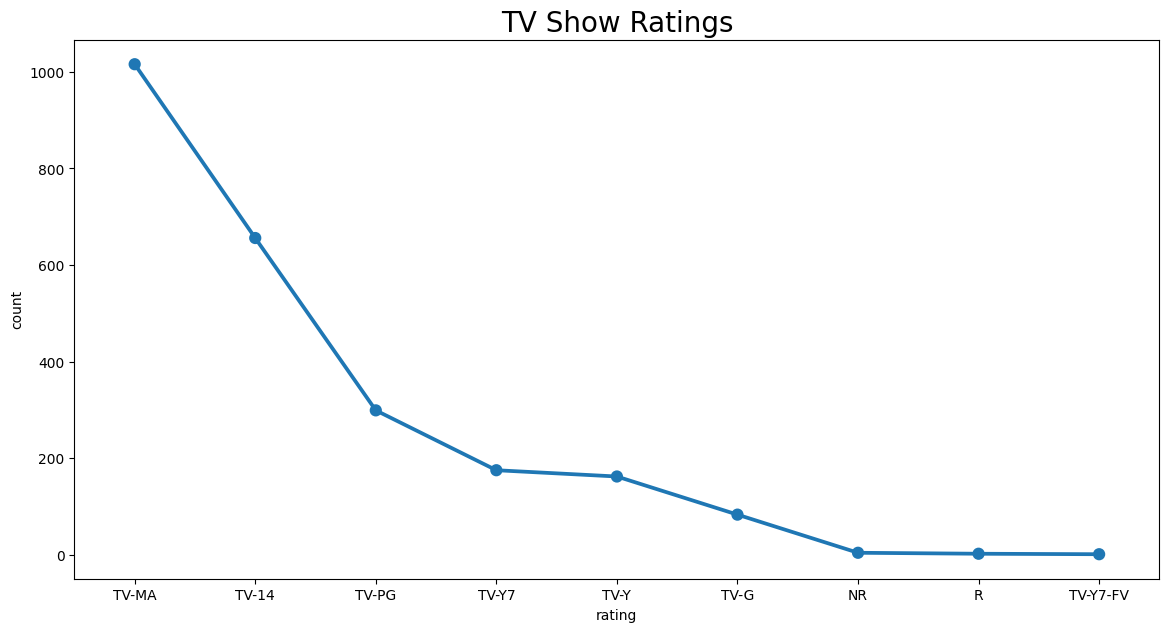

In [38]:
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig, ax = plt.subplots(figsize=(14,7))
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('TV Show Ratings',size='20')
plt.show()

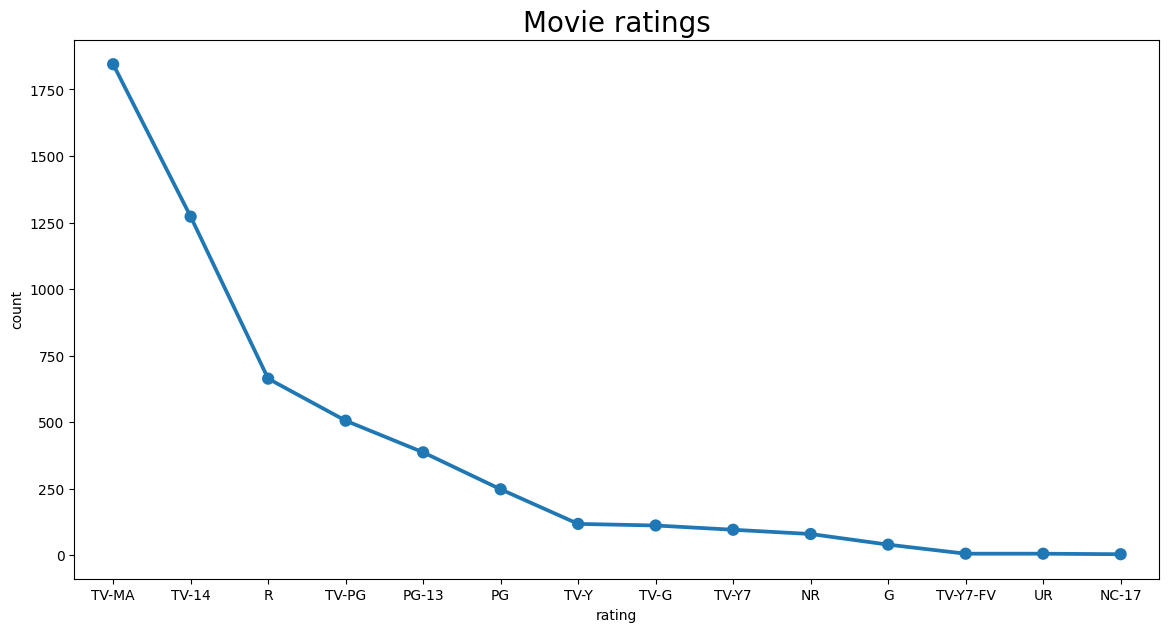

In [39]:
tv_ratings = movies.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count', ascending = False)
fig, ax = plt.subplots(figsize=(14,7))
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Movie ratings',size='20')
plt.show()

<Axes: title={'center': 'tv_show vs movie ratings'}, xlabel='rating', ylabel='count'>

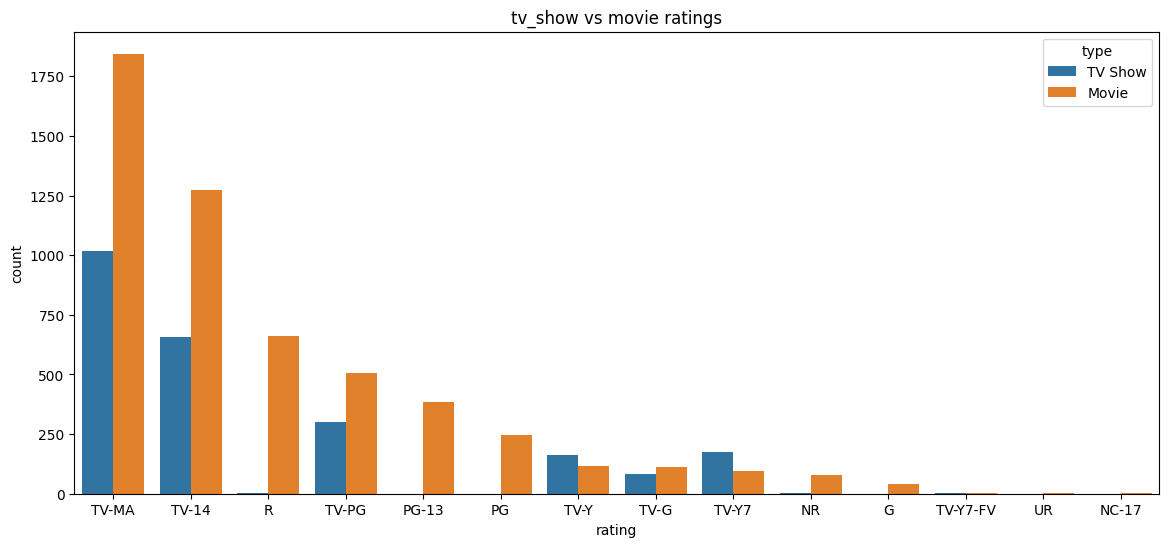

In [40]:
plt.figure(figsize=(14,6))
plt.title('tv_show vs movie ratings')
sns.countplot(x=df['rating'],hue=df['type'],data=movies,order=movies['rating'].value_counts().index)

* We can see that both movies and tv_shows got the highes rating as TV-MA. TV-MA belongs to mature content, so we can say most poular category belongs to mature conent.
* Then it is followed by TV-14 and TV-PG and this is belongs to Teen and older kids category.
* Here some contents got least rating belongs to NC-17 and TV-Y7-FV categories.
* Overall conclusion of the above graph is most of the content belongs to mature, teen and older kids categry.

**Duration**

<ipython-input-41-93d86915748c>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




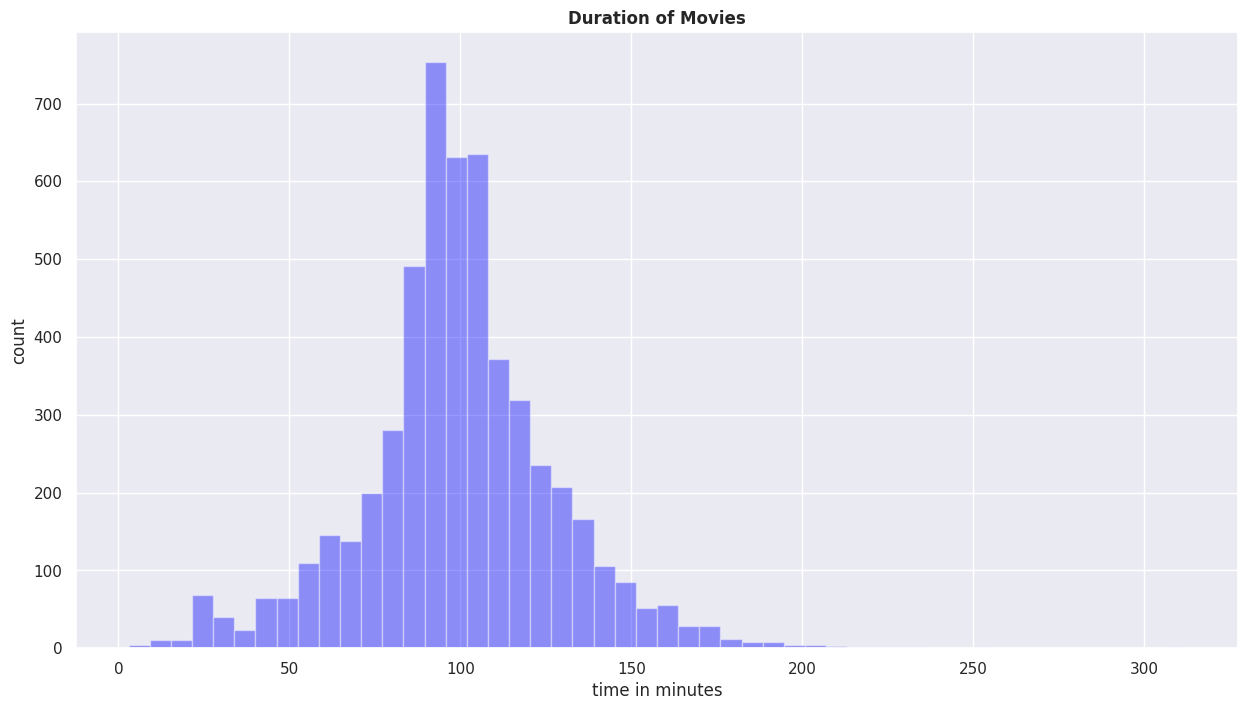

In [41]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.distplot(movies['duration'].str.extract('(\d+)'),kde=False, color=['blue'])
plt.title('Duration of Movies',fontweight="bold")
plt.xlabel('time in minutes')
plt.ylabel('count')
plt.show()

* For this graph, we can observe that more than 600 movies have duration lies between 80 to 120 minutes.

<Axes: title={'center': 'TV Shows duration as season'}, xlabel='duration', ylabel='count'>

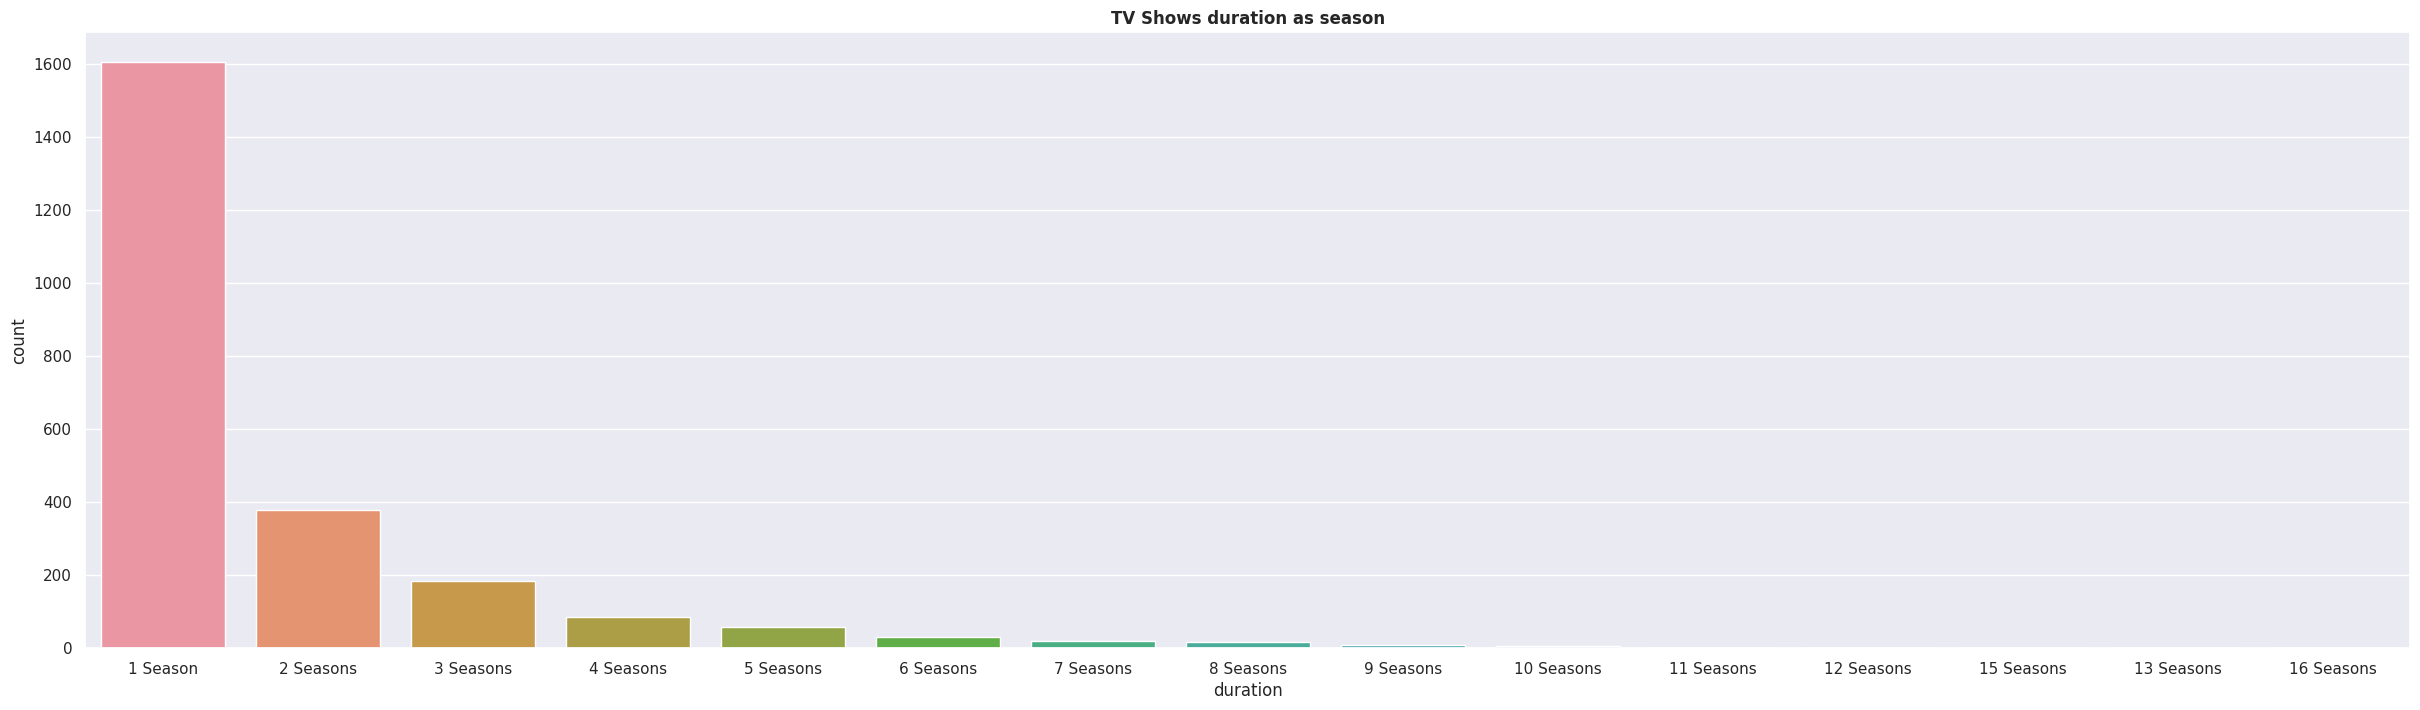

In [42]:
plt.figure(figsize=(30,8))
plt.title("TV Shows duration as season",fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)

* From this graph, we can observe that tv shows have only one session are most demanding tv_shows.
* As the number of seasons are increasing interest are decreasing among the viewers.

**Genre**

In [43]:
df.listed_in.nunique()

491

There are 491 unique values are present in listed_in(genre) and also no null value present.

In [44]:
# seperating genre from listed_in columns for analysis purpose
genres = df['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# top 10 genre in listed movie/show
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres[:10]

,genre,count
0,International Movies,2437
1,Dramas,2105
2,Comedies,1471
3,International TV Shows,1197
4,Documentaries,786
5,Action & Adventure,721
6,TV Dramas,703
7,Independent Movies,673
8,Children & Family Movies,532
9,Romantic Movies,531


In [45]:
len(genres)

42

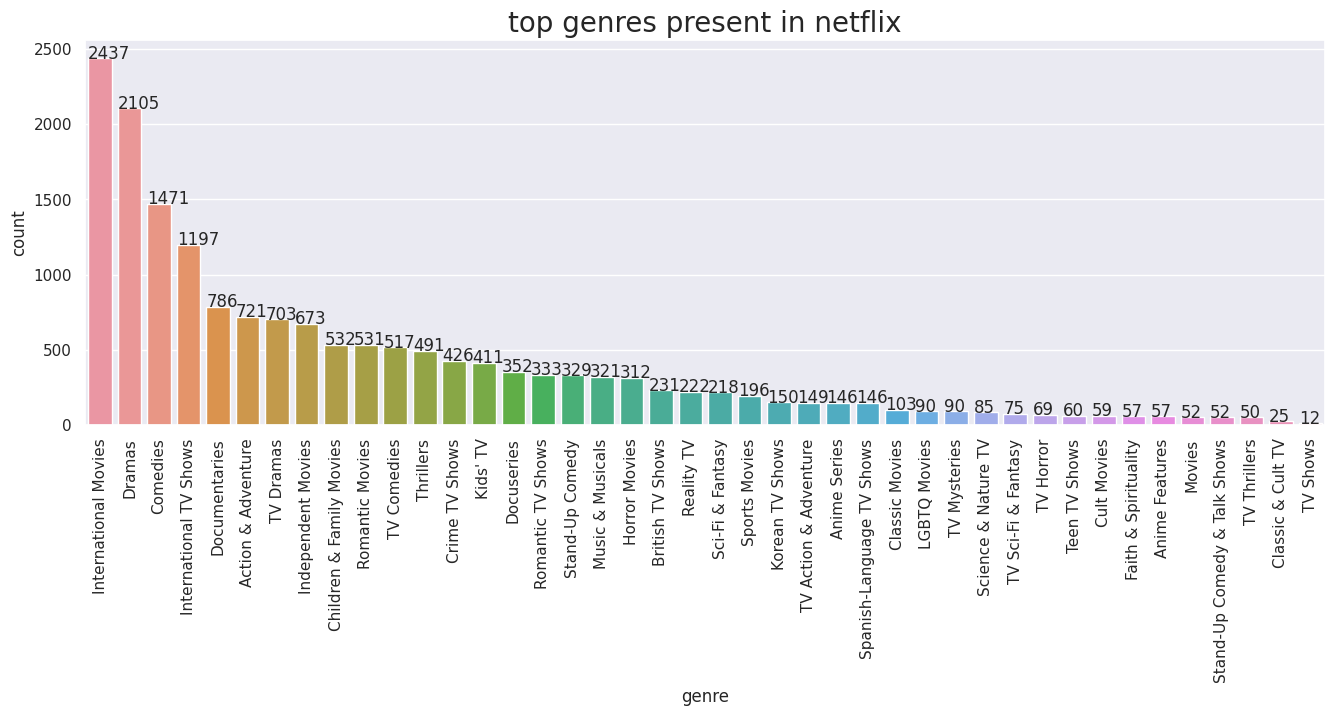

In [46]:
# plotting graph
plt.figure(figsize=(16,5))
graph = sns.barplot(x='genre', y='count', data=genres)
graph.set_title('top genres present in netflix', size=20)
plt.xticks(rotation=90)

#adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

plt.show()

**Obesrvation :**

* Highest number of genre belong from International movies, Dramas, Comedies respectively.
* Least number of genre belong from Classic & cult TV, TV Thriller, Stand-Up comedy and Talk show.

#Textual Data preprocessing(NLP)

**Modeling Approach**

Select the attributes based on which you want to cluster the shows


1.   Text preprocessing: Remove all stopwords and punctuation marks, convert all textual data to lowercase.
2.  Stemming to generate a meaningful word out of corpus of words.
3. Tokenization of corpus and Word vectorization.

4.   Dimensionality reduction
5.   Use different algorithms to cluster the movies, obtain the optimal number of clusters using different techniques.
6.  Build optimal number of clusters and visualize the contents of each cluster using wordclouds.










**Clustering Attributes**

We will cluster the movie/shows on Netflix based on the following attributes:

* Director
* Cast
* Country
* Rating
* Listed in (genres)
* Description

In [47]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [48]:
from wordcloud import WordCloud, STOPWORDS

In [65]:
# Create a string to store all the words.
comment_words = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)

# iterate through the column.
for val in df.title:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

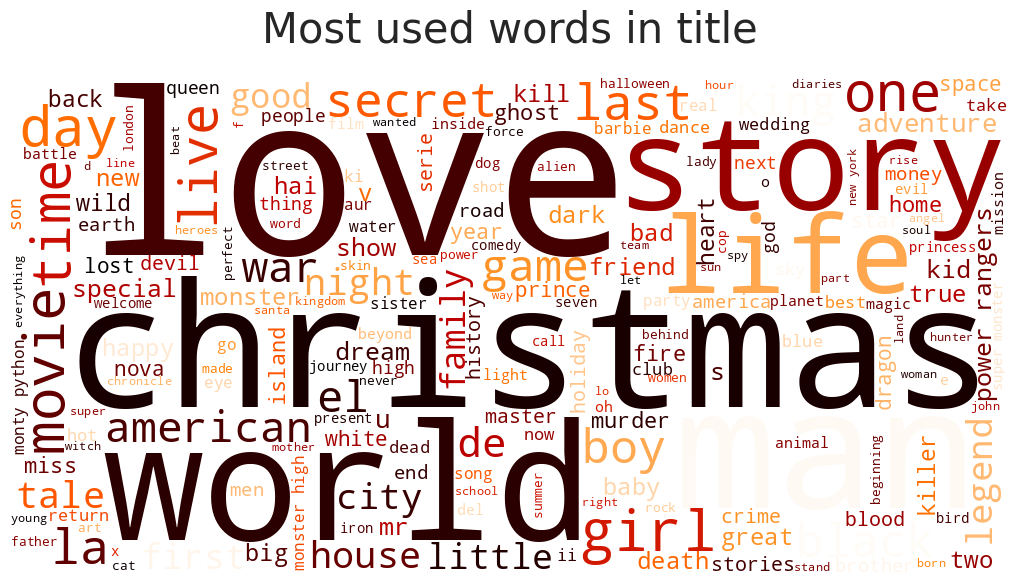

In [66]:
# plot the WordCloud image
plt.figure(figsize = (10, 8), facecolor = None)
plt.title('Most used words in title', fontsize = 30, pad=25)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

* Most frequent word in title column are love, Christmas, man, girl, world, life etc.

*  We can conclude that most of the movies and tv_shows release in december so christmas appears most of the time.

**Most used words in cast column**

In [67]:
# Create a string to store all the words.
cast_words = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)

# iterate through the column.
for val in df.cast:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    cast_words += " ".join(tokens)+" "

wordcloud2 = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(cast_words)

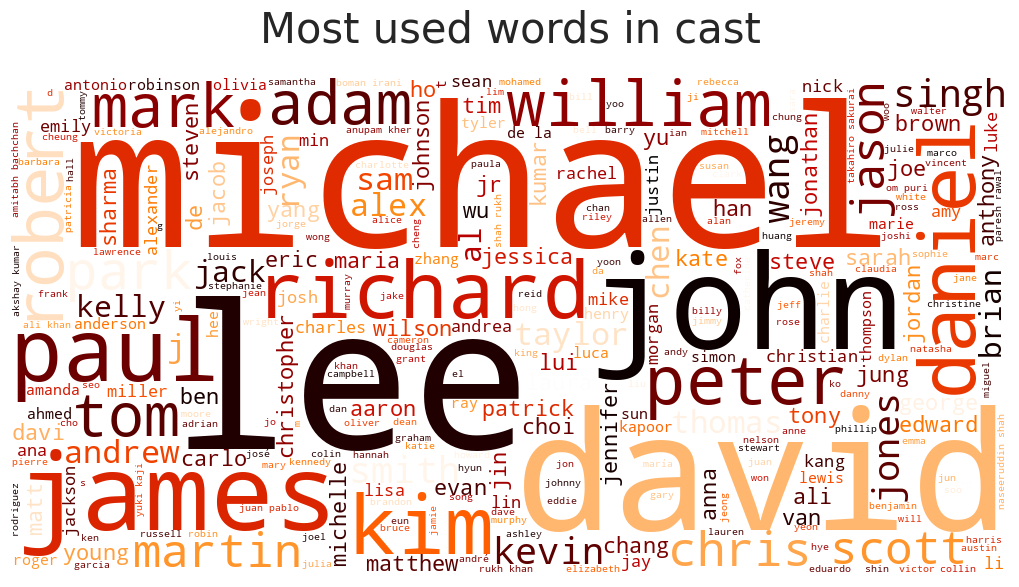

In [68]:
#plot the WordCloud image
plt.figure(figsize = (10, 8), facecolor = None)
plt.title('Most used words in cast', fontsize = 30, pad=25)
plt.imshow(wordcloud2)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

* Here we can see the most number of cast are not available(unknown) in the dataset then Michael, David, John, Lee, James, etc.

In [69]:
# Create a string to store all the words.
description_words = ''

# Remove the stopwords.
stopwords = set(STOPWORDS)

# iterate through the column.
for val in df.description:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    description_words += " ".join(tokens)+" "

wordcloud3 = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                contour_width=3, contour_color='steelblue').generate(description_words)

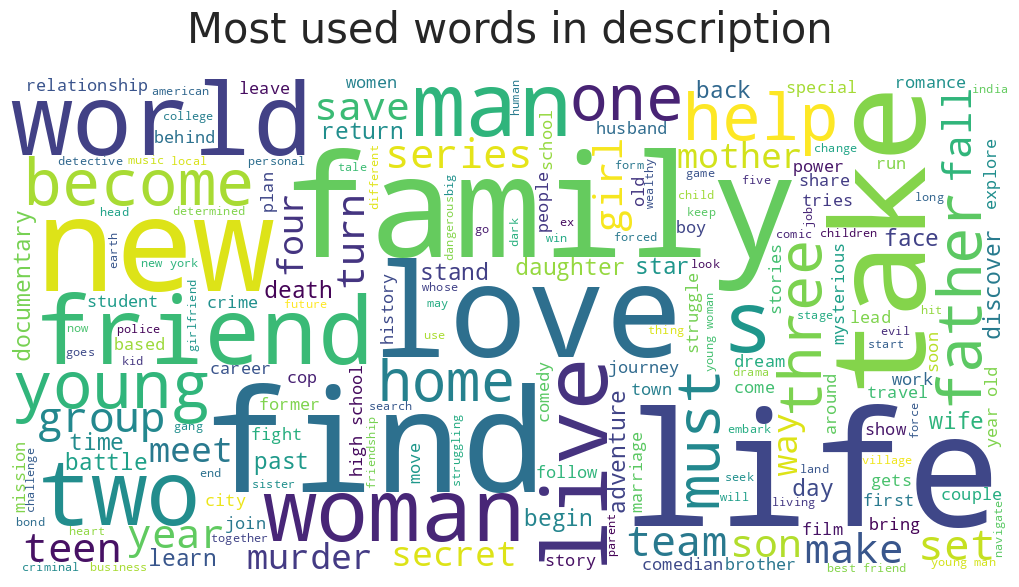

In [70]:
#plot the WordCloud image
plt.figure(figsize = (10, 8), facecolor = None)
plt.title('Most used words in description', fontsize = 30, pad=25)
plt.imshow(wordcloud3)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

* Here we cabn see most of the words in the description of the tv shows and movies are Family, Friend, Love, Life, World, Man, Woman, Father, etc.

In [49]:
# creating tags column using all text column which one is used for model building purpose.
df['tags'] = df['description'] + df['listed_in'] + df['rating'] + df['cast'] + df['country'] + df['director']

In [50]:
df['tags'].astype(str)

0       In a future where the elite inhabit an island ...
1       After a devastating earthquake hits Mexico Cit...
2       When an army recruit is found dead, his fellow...
3       In a postapocalyptic world, rag-doll robots hi...
4       A brilliant group of students become card-coun...
                              ...                        
7782    When Lebanon's Civil War deprives Zozo of his ...
7783    A scrappy but poor boy worms his way into a ty...
7784    In this documentary, South African rapper Nast...
7785    Dessert wizard Adriano Zumbo looks for the nex...
7786    This documentary delves into the mystique behi...
Name: tags, Length: 7770, dtype: object

In [51]:
df.tags[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.International TV Shows, TV Dramas, TV Sci-Fi & FantasyTV-MAJoão Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazil '

In [52]:
df['tags'].dropna(inplace = True)

* We have successfully added all the necessary data into a single column.

**Removing Stopwords and Lower Casing.**

* Removing stop words and lowercasing words are common pre-processing steps in natural language processing (NLP) tasks.

* Stop words are words that are commonly used in a language but do not convey much meaning on their own, such as "a," "an," "the," and "is." These words can add noise to the data and can sometimes affect the performance of NLP models, so they are often removed as a pre-processing step.

**Lowercasing words** is the process of converting all the words in a text to lowercase. This is a common pre-processing step in NLP tasks, as it can be useful for a few reasons:

1. Case differences can be ignored: By lowercasing the words, you can treat words with different capitalization as the same word, which can be useful in tasks such as information retrieval or text classification where case differences are not important.

2. Vocabulary size is reduced: Lowercasing the words can also reduce the size of the vocabulary, which can make it easier to work with larger texts or texts in languages with a high number of inflected forms.

In [53]:
# download the stop words list if it is not already downloaded
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
np.array(stop_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [54]:
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [55]:
# applying stopwords function.
df['tags'] = df['tags'].apply(stopwords)

In [56]:
df.tags[0]

'future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor.international tv shows, tv dramas, tv sci-fi & fantasytv-majoão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschibrazil'

* We have successfully removed all the stopwords and converted the corpus to lowercase.

**Removing Punctuations**

* Removing punctuation is a common pre-processing step in natural language processing (NLP) tasks.
* Punctuation marks like periods, commas, and exclamation points can add noise to the data and can sometimes be treated as separate tokens, which can affect the performance of NLP models.


In [57]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [58]:
# applying remove_punctuation function
df['tags'] = df['tags'].apply(remove_punctuation)

In [59]:
df['tags'][0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalorinternational tv shows tv dramas tv scifi  fantasytvmajoão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschibrazil'

* We have successfully remove all the punctuation marks from the corpus.

**Stemming**

* Used SnowballStemmer to generate a meaningful word out of corpus of words.

* Stemming is the process of reducing a word to its base or root form. This is a common pre-processing step in natural language processing (NLP) tasks, as it allows you to treat different inflected forms of a word as the same word, which can be useful for tasks like information retrieval or text classification.

* For example, the words "run," "runs," "ran," and "running" are all different inflected forms of the same word "run," and a stemmer can reduce them all to the base form "run."

In [60]:
from nltk.stem.snowball import SnowballStemmer

# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)


In [61]:
# appying stemming function
df['tags'] = df['tags'].apply(stemming)

In [62]:
df.tags[0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalorintern tv show tv drama tv scifi fantasytvmajoão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschibrazil'

* We have stem the corpus.

**Text Vectorization**

Word/Text vectorization is the process of representing words as numerical vectors. This is important in NLP tasks because most machine learning models expect numerical input and cannot work with raw text data directly. Word vectorization allows you to input the words into a machine learning model in a way that preserve the meaning and context of the words. Word vectorization can also be used to measure the similarity between words using vector arithmetic.

* We can vectorize the corpus using TFIDF vectorizer, where TFIDF stands for Term Frequency Inverse Document Frequency.

* TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

* IDF(t) =log`e`(Total no. of documents / No. of documents with term t in it)



In [63]:
# create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)   # max features = 10000 to prevent system from crashing

# fit the vectorizer using the text data
tfidf.fit(df['tags'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [64]:
print(len(dictionary)) #number of independet features created from "tags" columns ---> max_features=10000

10000


In [71]:
# convert vector into array form for clustering
vector = tfidf.transform(df['tags']).toarray()

# summarize encoded vector
print(vector)
print(f'shape of the vector : {vector.shape}')
print(f'datatype : {type(vector)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7770, 10000)
datatype : <class 'numpy.ndarray'>


**Dimesionality Reduction**

* We can use PCA (Principal component Analysis) to reduce the dimensionality of data.

* Dimensionality reduction is the process of reducing the number of features or dimensions in a dataset while preserving as much information as possible. It is a common step in machine learning and data analysis, as high-dimensional datasets can be difficult to work with and can sometimes suffer from the curse of dimensionality.

In [72]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(vector)

PCA(random_state=42)

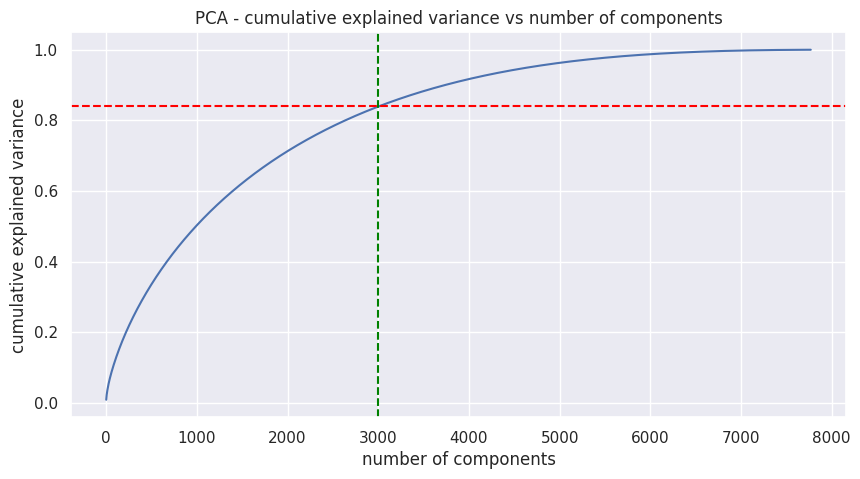

In [75]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y= 0.84, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()

* We find that 100% of the variance is explained by about ~7500 components.
* Also, more than 80% of the variance is explained just by 3000 components.
* Hence to simplify the model, and reduce dimensionality, we can take the top 3000 components, which will still be able to capture more than 80% of variance.

In [76]:
# reducing the dimensions to 3000 using pca
pca = PCA(n_components=3000, random_state=42)
pca.fit(vector)

PCA(n_components=3000, random_state=42)

In [77]:
# transformed features
X = pca.transform(vector)

# shape of transformed vectors
X.shape


(7770, 3000)

**Clusters implementation**

K-Means Clustering

K-means clustering is an unsupervised machine learning algorithm that is used to divide a dataset into a specified number of clusters. It is called "unsupervised" because the algorithm does not use any labeled examples to learn about the data. Instead, it relies on the inherent structure of the data to group the samples into clusters.

How It's Work?

1. The k-means algorithm works by first selecting k initial "centroids," or cluster centers, at random from the data.
2. Then, it assigns each sample in the dataset to the nearest centroid, based on some distance metric like Euclidean distance.
3. The algorithm then updates the centroids to be the mean of the samples in each cluster.
4. Iteratively repeats the process of reassigning samples to the nearest centroids and updating the centroids until convergence.

Visualizing the elbow curve and Silhouette score to decide on the optimal number of clusters for K-means clustering algorithm.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

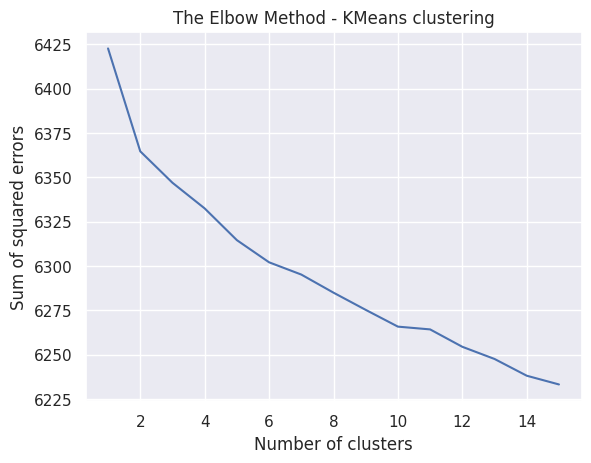

In [78]:
'''Elbow method to find the optimal value of k'''

# Initialize a list to store the sum of squared errors for each value of k
SSE = []

for k in range(1, 16):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Compute the sum of squared errors for the model
  SSE.append(kmeans.inertia_)

# Plot the values of SSE
plt.plot(range(1, 16), SSE)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

* The sum of squared distance between each point and the centroid in a cluster decreases with the increase in the number of clusters.

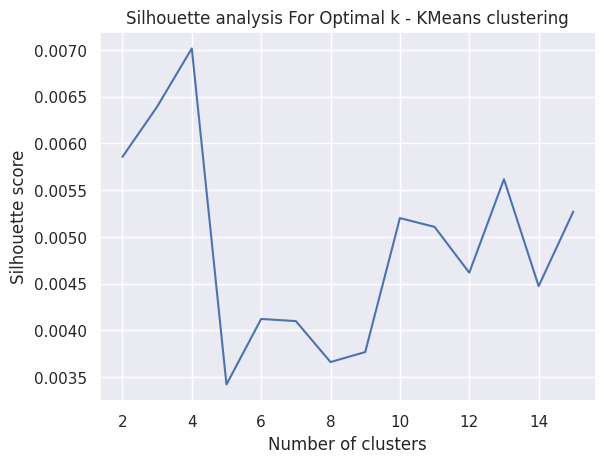

In [80]:
'''Silhouette score method to find the optimal value of k'''

# Initialize a list to store the silhouette score for each value of k
silhouette_avg = []

for k in range(2, 16):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # Compute the silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_avg.append(score)

# Plot the Silhouette analysis
plt.plot(range(2,16), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

* The highest Silhouette score is obtained for 4 clusters.

Building 4 clusters using the k-means clustering algorithm:

In [81]:
# Clustering the data into 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=33)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=33)

In [82]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))

(6332.459242990322, 0.006983690081630778)


In [83]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

In [84]:
df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'kmeans_cluster']]

,type,title,director,cast,country,rating,listed_in,description,kmeans_cluster
274,Movie,Aata Pita,Uttung Shelar,"Sanjay Narvekar, Bharat Jadhav, Satish Phuleka...",India,TV-14,"Comedies, Dramas, International Movies",A municipal clerk with literary ambitions stal...,1
3087,TV Show,IZombie,,"Rose McIver, Malcolm Goodwin, Rahul Kohli, Rob...",United States,TV-MA,"TV Comedies, TV Dramas, TV Horror",A medical student-turned-zombie tries to retai...,2
7285,Movie,Two Catalonias,"Álvaro Longoria, Gerardo Olivares",,Spain,TV-MA,"Documentaries, International Movies",Lawmakers and activists with conflicting ideol...,1
6141,Movie,The Blazing Sun,Youssef Chahine,"Omar Sharif, Faten Hamama, Zaki Rostom, Farid ...",Egypt,TV-14,"Classic Movies, Dramas, International Movies",Competition between sugar cane producers turns...,1
4645,Movie,One Last Shot,Mike Clattenburg,"Robb Wells, John Paul Tremblay, John Dunsworth",Canada,TV-MA,Comedies,"In this low-budget short film, two best buddie...",3


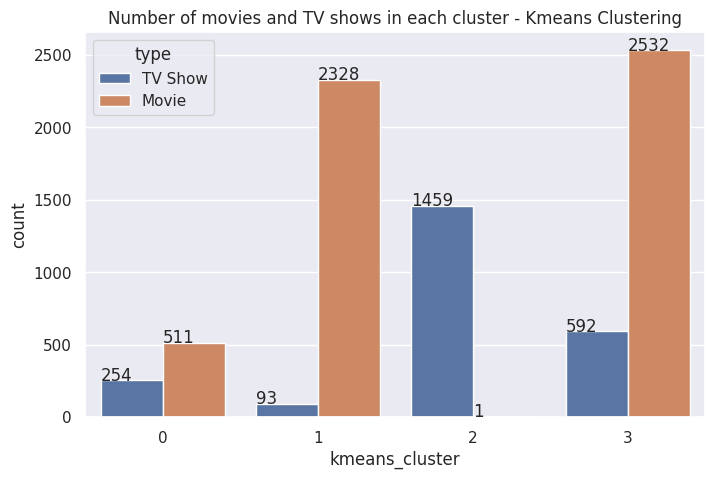

In [85]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,5))
graph = sns.countplot(x='kmeans_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

* Successfully built 4 clusters using the k-means clustering algorithm.


**Hierarchical clustering**

Building clusters using the Agglomerative (hierarchical) clustering algorithm.

* Agglomerative hierarchical clustering is a method of clustering that is used to build a hierarchy of clusters. It is a bottom-up approach, where each sample is initially treated as a single-sample cluster and clusters are merged together as they are deemed similar.

**How it's work?**

1. The algorithm starts by calculating the distance between all pairs of samples and storing them in a distance matrix.
2. Then selects the two closest clusters and merges them into a single cluster.
3. Above process is repeated until all the samples are in the same cluster.

The resulting clusters form a tree-like structure called a dendrogram, which shows the relationships between the clusters at each level of the hierarchy.

Visualizing the dendrogram to decide on the optimal number of clusters for the agglomerative (hierarchical) clustering algorithm:

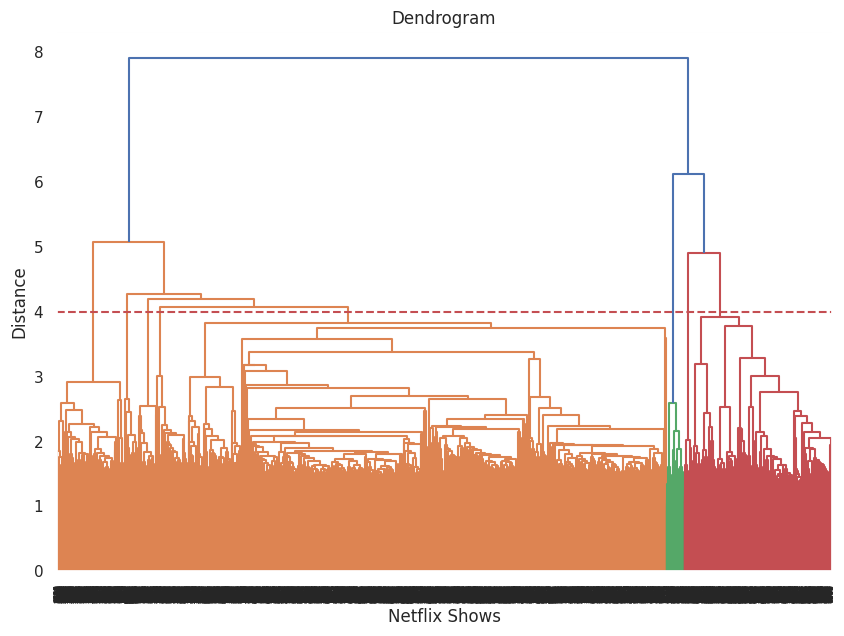

In [86]:
# Building a dendogram to decide the number of clusters
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 4, color='r', linestyle='--')

* At a distance of 4 units, 8 clusters can be built using the agglomerative clustering algorithm.

Building 8 clusters using the Agglomerative clustering algorithm:

In [87]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(X)

array([1, 1, 0, ..., 1, 0, 1])

In [88]:
# Adding a hierarchical cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

In [90]:
df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'hierarchical_cluster']]

,type,title,director,cast,country,rating,listed_in,description,hierarchical_cluster
551,Movie,Anthony Jeselnik: Thoughts and Prayers,Adam Dubin,Anthony Jeselnik,United States,TV-MA,Stand-Up Comedy,There's no subject too dark as the comedian sk...,3
4664,Movie,Opening Night,Isaac Rentz,"Topher Grace, Alona Tal, Anne Heche, Taye Digg...",United States,TV-MA,"Comedies, Independent Movies, Music & Musicals","Once a rising star on Broadway, Nick is now th...",1
5101,TV Show,Rapture,,"Logic, Nas, Dave West, T.I., G-Eazy, 2 Chainz,...",United States,TV-MA,Docuseries,Groundbreaking artists share their life storie...,1
1835,Movie,Doubles Cause Troubles,Wong Jing,"Carol 'Do Do' Cheng, Maggie Cheung, Wilson Lam...",Hong Kong,TV-14,"Action & Adventure, Comedies, International Mo...",When the tenant in their flat dies under suspi...,0
571,Movie,Arctic Dogs,Aaron Woodley,"Jeremy Renner, Heidi Klum, James Franco, John ...","India, United Kingdom, China, Canada, Japan, S...",PG,"Children & Family Movies, Comedies",When he stumbles upon evil Otto Von Walrus's s...,1


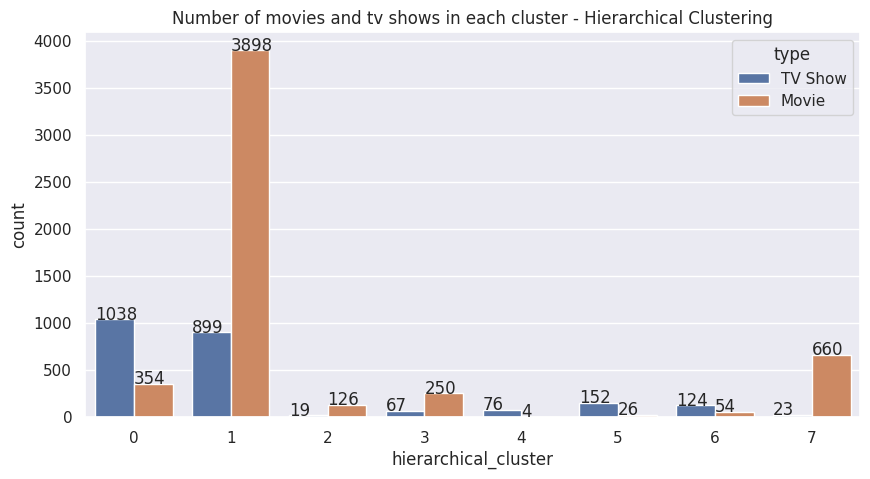

In [91]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

* Successfully built 8 clusters using the Agglomerative (hierarchical) clustering algorithm.

#Content Based Recommendation System

Content-based recommendation systems recommend items to a user by using the similarity of items. This recommender system recommends products or items based on their description or features. It identifies the similarity between the products based on their descriptions.

It short notes which items a particular user likes and also the items that the users with behavior and likings like him/her likes, to recommend items to that user.

* We can build a simple content based recommender system based on the similarity of the movie/shows.
* If a person has watched a show on Netflix, the recommender system must be able to recommend a list of similar shows that s/he likes.
* To get the similarity score of the shows, we can use cosine similarity.
* The similarity between two vectors (A and B) is calculated by taking the dot product of the two vectors and dividing it by the magnitude value. We can simply say that the cosine similarity score of two vectors increases as the angle between them decreases.

In [92]:
# veryfying index
df[['show_id', 'title', 'tags']]

,show_id,title,tags
0,s1,3%,futur elit inhabit island paradis far crowd sl...
1,s2,7:19,devast earthquak hit mexico citi trap survivor...
2,s3,23:59,armi recruit found dead fellow soldier forc co...
3,s4,9,postapocalypt world ragdol robot hide fear dan...
4,s5,21,brilliant group student becom cardcount expert...
...,...,...,...
7782,s7783,Zozo,lebanon civil war depriv zozo famili hes left ...
7783,s7784,Zubaan,scrappi poor boy worm way tycoon dysfunct fami...
7784,s7785,Zulu Man in Japan,documentari south african rapper nasti c hit s...
7785,s7786,Zumbo's Just Desserts,dessert wizard adriano zumbo look next “willi ...


* As you can see above dataframe there are total 7770 rows present in our dataframe and it show last index as 7786 because of dropping some of the rows while treating null values.

* In order to build content based recommendation system we find out similarity score on the basis of specific index_id with respect to that specific "tags" column.

* If we can't reset the index there is highly chances that we calculate cosine similarity for another one index instead of that we provide index. In order to avoid this problem and address index properly while building recommandation system. We simply reset the index.

In [93]:
# defining new dataframe for building recommandation system
recommender_df = df.copy()

# reseting index
recommender_df.reset_index(inplace=True)

# checking whether or not reset index properly
recommender_df[['show_id', 'title', 'tags']]

,show_id,title,tags
0,s1,3%,futur elit inhabit island paradis far crowd sl...
1,s2,7:19,devast earthquak hit mexico citi trap survivor...
2,s3,23:59,armi recruit found dead fellow soldier forc co...
3,s4,9,postapocalypt world ragdol robot hide fear dan...
4,s5,21,brilliant group student becom cardcount expert...
...,...,...,...
7765,s7783,Zozo,lebanon civil war depriv zozo famili hes left ...
7766,s7784,Zubaan,scrappi poor boy worm way tycoon dysfunct fami...
7767,s7785,Zulu Man in Japan,documentari south african rapper nasti c hit s...
7768,s7786,Zumbo's Just Desserts,dessert wizard adriano zumbo look next “willi ...


* As you can see above dataframe We successfully reset the index. Now dataset is ready to build content based recommandation system.

In [94]:
# dropping show-id and index column
recommender_df.drop(columns=['index', 'show_id'], inplace=True)

In [95]:
print(f"before reset index id for movie 'Zero' : {df[df['title'] == 'Zero'].index[0]}")  # index[0] --> to locate index position
print(f"after reset index id for movie 'Zero': {recommender_df[recommender_df['title'] == 'Zero'].index[0]}")


before reset index id for movie 'Zero' : 7764
after reset index id for movie 'Zero': 7747


In [96]:
# calling out transformed array independent features created from tags(cluster) column after performing PCA for dimenssionality reduction.
X

array([[ 1.64742233e-01, -1.87656227e-04,  5.34957932e-03, ...,
         3.21805475e-03, -2.37843253e-03,  1.43486150e-03],
       [-4.39211529e-02, -1.25624310e-02, -1.14067417e-02, ...,
         4.42031263e-03, -5.48633111e-03, -5.06905298e-03],
       [-4.18023740e-02, -4.18474761e-02,  4.23545914e-02, ...,
         1.32716291e-02, -5.91061372e-03,  7.15299305e-03],
       ...,
       [-7.27563432e-02, -1.75690663e-02, -7.36613874e-02, ...,
        -1.07700913e-02, -2.53430787e-04,  4.74182926e-03],
       [ 6.92416158e-02,  3.69103997e-02, -2.52567717e-02, ...,
         9.32767446e-03,  7.73733927e-03,  3.84605549e-03],
       [-6.17251715e-02,  1.90419151e-01, -1.53007985e-01, ...,
        -4.64369218e-04,  7.56260249e-03,  6.70269199e-03]])

**Cosine Similarity**

In [97]:
# calculate cosine similarity
similarity = cosine_similarity(X)
similarity

array([[ 1.        ,  0.08945623,  0.02255733, ..., -0.02361476,
         0.01043316, -0.02217486],
       [ 0.08945623,  1.        , -0.00317204, ...,  0.07223616,
        -0.01077566, -0.01049545],
       [ 0.02255733, -0.00317204,  1.        , ...,  0.00100078,
        -0.01026568, -0.01375445],
       ...,
       [-0.02361476,  0.07223616,  0.00100078, ...,  1.        ,
        -0.01545593,  0.05421083],
       [ 0.01043316, -0.01077566, -0.01026568, ..., -0.01545593,
         1.        ,  0.04236113],
       [-0.02217486, -0.01049545, -0.01375445, ...,  0.05421083,
         0.04236113,  1.        ]])

####Function for list down top 10 recommended movie on the basis of cosine similarity score.

In [98]:
def recommend(movie):
    '''
    This function list down top ten movies on the basis of similarity score for that perticular movie.
    '''
    print(f"If you liked '{movie}', you can also prefer: \n")

    # find out index position
    index = recommender_df[recommender_df['title'] == movie].index[0]

    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])

    # listing top ten recommenaded movie
    for i in distances[1:11]:
        print(df.iloc[i[0]].title)

In [99]:
recommend('Naruto')

If you liked 'Naruto', you can also prefer: 

Naruto Shippûden the Movie: Bonds
Naruto Shippuden: The Movie
Naruto Shippuden : Blood Prison
Naruto the Movie 2: Legend of the Stone of Gelel
Naruto Shippûden the Movie: The Will of Fire
Naruto the Movie 3: Guardians of the Crescent Moon Kingdom
Naruto Shippuden: The Movie: The Lost Tower
Dino Girl Gauko
DRIFTING DRAGONS
Marvel Anime: Wolverine


In [100]:
recommend('Our Planet')

If you liked 'Our Planet', you can also prefer: 

Nature's Great Events: Diaries
Nature's Great Events (2009)
Nature's Weirdest Events
Blue Planet II
Planet Earth II
Life Story
The Making of Frozen Planet
Night on Earth
Moving Art
The Hunt


In [101]:
recommend('Phir Hera Pheri')

If you liked 'Phir Hera Pheri', you can also prefer: 

Bhool Bhulaiyaa
Thank You
Golmaal: Fun Unlimited
Chup Chup Ke
Bhagam Bhag
Ready
Khushi
Life in a ... Metro
Hattrick
Hasee Toh Phasee


**INFERENCE**

* In this given dataset of Netflix there are total of 7787 rows and 12 columns.
* There are some null values present in some features like director, cast, country, data added, release year and rating.
* After analysing netflix dataset, it shows 5372 movies  and 2398 tv_shows.
* There are more number of movies than tv_shows present on netflix.
* In USA number of content released or added is highest followed by india.
* Most of the content were added in 2019 on netfix. We can also obserb that most of the movies were added in 2019 and tv_shows in 2020.
* After year 2018 the popularity of tv_shows increases with respect to movies.


* TV-MA has the highest rating for both movies and tv_shows which shows that mature and teen content is most popular on netflix. Least rating for tv_shows is TV-y7FV and movie is NC-17 which is a adult category.
* The highest duration of the movies lies between 80 to 120 minutes and most of the popular tv_shows having only 1 season.

* So we can conclude that frequent words of listed_in are tv, thriller, teen and least frequent words are adventure, action. So the popularity of tv_shows is higher than any genre of the movies. in movies most poular genere is thriller followed by teen.

* Now cluster the data based on the attributes: director, cast, country, genre, rating and description. The values in these attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.
* Through TFIDF Vectorization, we created a total of 10000 attributes.
* We used Principal Component Analysis (PCA) to handle the curse of dimensionality. 3000 components were able to capture more than 80% of variance, and hence, the number of components were restricted to 3000.
* We first built clusters using the K-Means Clustering algorithm, and the optimal number of clusters came out to be 5. This was obtained through the elbow method and Silhouette score analysis.
* Then clusters were built using the Agglomerative clustering algorithm, and the optimal number of clusters came out to be 7. This was obtained after visualizing the dendrogram.
* A content based recommender system was built using the similarity matrix obtained after using cosine similarity.
* This recommender system will make 10 recommendations to the user based on the type of show they watched.tc.